<a href="https://colab.research.google.com/github/sora3765/regression-analysis-sales-forecast/blob/main/2_1_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AB%E3%82%88%E3%82%8B%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
sns.set_style('whitegrid')

%precision 3
%matplotlib inline

In [2]:
# カリフォルニア住宅価格のデータセットを読み込む
housing = fetch_california_housing()

dataset = pd.DataFrame(housing.data, columns=housing.feature_names)
dataset['Price'] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [5]:
# 全てfloat型で欠損なし

In [6]:
dataset.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f6c807f0>,
      dtype=object)

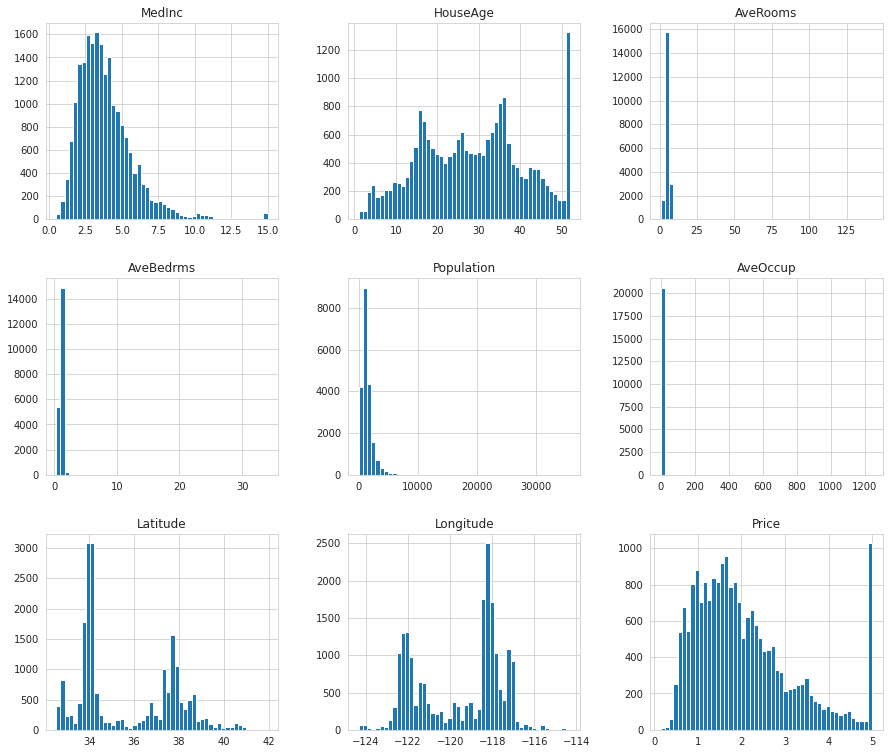

In [7]:
dataset.hist(bins=50, figsize=(15, 13))

<Figure size 1440x1080 with 0 Axes>

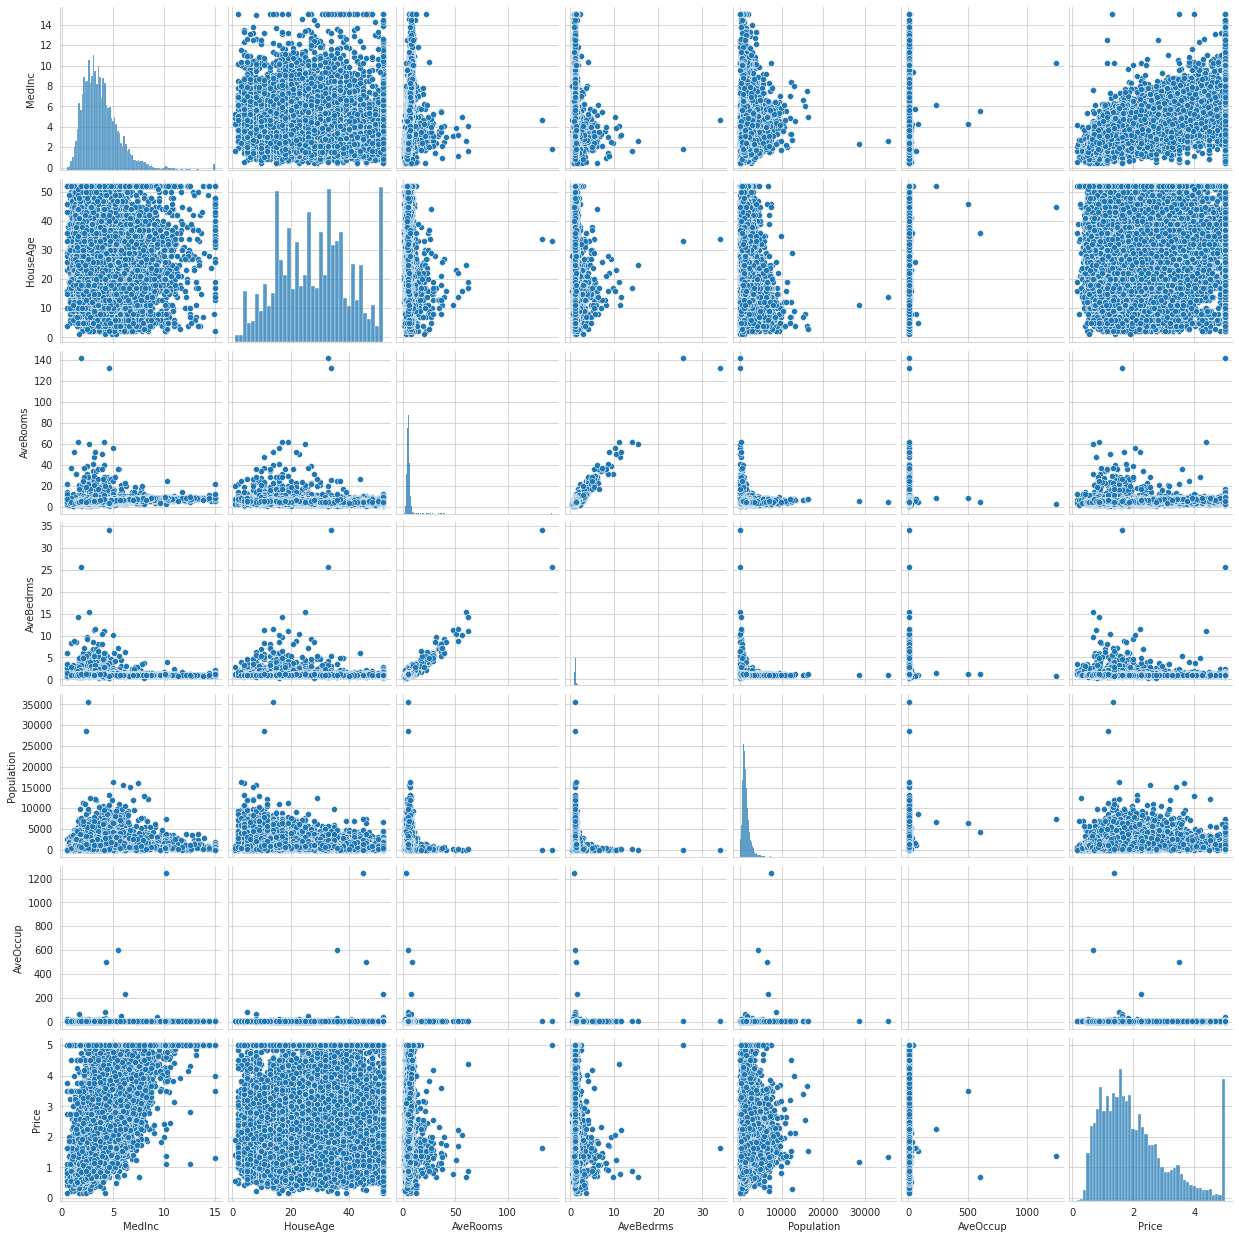

In [8]:
# データ同士の相関図
# 縦軸と横軸にそれぞれ各変数を取ることで、２つの変数間の関係性を見る

plt.figure(figsize=(20, 15))
sns.pairplot(dataset.drop(['Latitude', 'Longitude'], axis=1))

In [9]:
# 強い相関を持っている!

In [10]:
# ======================================

In [11]:
# データを 説明変数 と 目的変数 に分割
X = dataset.drop(['Price'], axis=1)
y = dataset['Price']

In [12]:
X = dataset.drop(['Price'], axis=1)

In [13]:
y = dataset['Price']

In [14]:
# =======================================

In [15]:
from sklearn.preprocessing import StandardScaler

 # 初期化
scaler = StandardScaler()
 # データに合わせて計算し標準化する
X = scaler.fit_transform(X)

In [16]:
scaler = StandardScaler()

In [17]:
X = scaler.fit_transform(X)

In [18]:
# データの分割用ライブラリ
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [19]:
X_train.shape, X_test.shape
# 出力結果
# (18576, 8) (2064, 8)


((18576, 8), (2064, 8))

In [20]:
#訓練用データとして、 18576 行のデータ
#検証用データとして、 2064 行のデータ

In [21]:
#=======================================================

In [22]:
# LinearRegression と呼ばれる回帰分析のための機械学習モデルをインポート

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test[:5])
y_pred = np.round(y_pred, 3)

print(f"予測結果: {y_pred}")
print(f"正解ラベル: {list(y_test[:5])}")

予測結果: [2.123 0.939 2.699 1.711 2.819]
正解ラベル: [3.55, 0.707, 2.294, 1.125, 2.254]


In [24]:
# 実行

from sklearn.metrics import mean_squared_error

 # 予測結果
pred_2 = model.predict(X_test)

 # 平均二乗誤差の算出
mse = mean_squared_error(y_test, pred_2)

 # 平均二乗誤差の平方根を取る
rmse = np.sqrt(mse)

print(f"誤差:{rmse}")


誤差:0.7326991013055667


In [25]:
#普通0にするのは困難なので　どのくらいなら良いのか考える